In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data_extraction/canada_residency_data.csv')

C:\Users\xuebi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_menage_region = df[("Taille moyenne des ménages"!=df["Taille du ménage (8)"])]

In [3]:
data_menage_region

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),COORDONNÉES,VALEUR
0,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Total - Type de construction résidentielle,Total - Taille du ménage,##############################################...,5830.0
2,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison individuelle non attenante,Total - Taille du ménage,##############################################...,4945.0
4,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison jumelée,Total - Taille du ménage,##############################################...,200.0
6,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Maison en rangée,Total - Taille du ménage,##############################################...,105.0
8,2021.0,Communauté maritime des Îles-de-la-Madeleine,2021A00032401,Appartement ou plain-pied dans un duplex,Total - Taille du ménage,##############################################...,160.0
...,...,...,...,...,...,...,...
1727,2021.0,Nord-du-Québec,2021A00032499,Appartement dans un immeuble de moins de cinq ...,Total - Taille du ménage,2212-06-01,1780.0
1730,2021.0,Nord-du-Québec,2021A00032499,Autre maison individuelle attenante,Total - Taille du ménage,2212-08-01,25.0
1732,2021.0,Nord-du-Québec,2021A00032499,Logement mobile,Total - Taille du ménage,2212-09-01,920.0
1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_menage_region[(data_menage_region["GÉO"] == "Abitibi")&("Total - Type de construction résidentielle"==df["Type de construction résidentielle (9)"])]

C:\Users\xuebi\AppData\Local\Temp\ipykernel_16504\265122929.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_menage_region[(data_menage_region["GÉO"] == "Abitibi")&("Total - Type de construction résidentielle"==df["Type de construction résidentielle (9)"])]


,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Type de construction résidentielle (9),Taille du ménage (8),COORDONNÉES,VALEUR
1523,2021.0,Abitibi,2021A00032488,Total - Type de construction résidentielle,Total - Taille du ménage,2050-01-01,10940.0


In [19]:
total_region = data_menage_region[("Total - Type de construction résidentielle"==df["Type de construction résidentielle (9)"])]
total_region = total_region.sort_values(by=['VALEUR'],ascending=False)

C:\Users\xuebi\AppData\Local\Temp\ipykernel_16504\3077079071.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_region = data_menage_region[("Total - Type de construction résidentielle"==df["Type de construction résidentielle (9)"])]


In [22]:
total_region.iloc[0]

PÉRIODE DE RÉFÉRENCE                                                                 2021.0
GÉO                                                                                Montréal
DGUID                                                                         2021A00032466
Type de construction résidentielle (9)           Total - Type de construction résidentielle
Taille du ménage (8)                                               Total - Taille du ménage
COORDONNÉES                               ##############################################...
VALEUR                                                                             910360.0
Name: 1131, dtype: object

In [23]:
total_region = total_region.iloc[:10]

<Axes: title={'center': 'Nombre de résidences en fonction des zones majeures'}, xlabel='GÉO', ylabel='nombre de residences'>

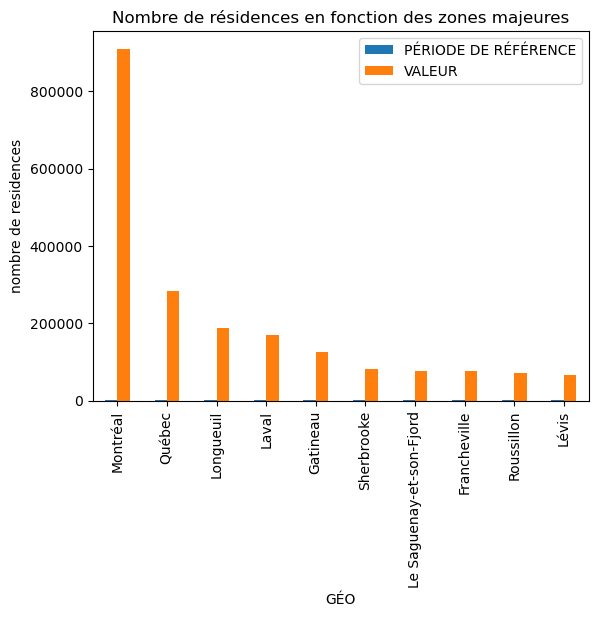

In [24]:
total_region.plot(kind = "bar", x = 'GÉO', title="Nombre de résidences en fonction des zones majeures", ylabel = "nombre de residences")

In [9]:
total_region = data_menage_region[data_menage_region["VALEUR"] > 10000][["Type de construction résidentielle (9)", "VALEUR"]]
total_region = total_region.sort_values(by=['VALEUR'],ascending=False)

In [10]:
total_by_category = total_region.groupby(['Type de construction résidentielle (9)']).sum()
total_by_category = total_by_category.sort_values(by=['VALEUR'],ascending=False)

<Axes: xlabel='Type de construction résidentielle (9)'>

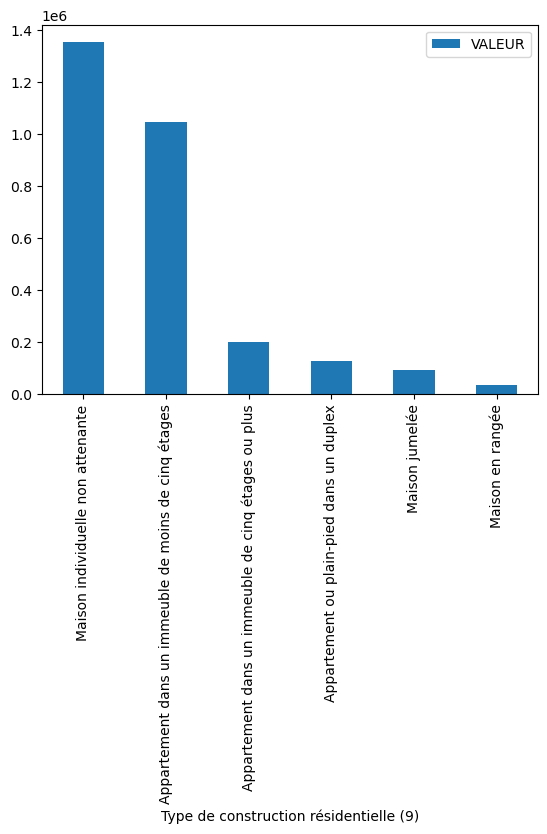

In [11]:
total_by_category.plot(kind = "bar")

In [12]:
total_region = data_menage_region[data_menage_region["VALEUR"] > 10000][["GÉO", "Type de construction résidentielle (9)", "VALEUR"]]
total_by_category = total_region.groupby(["GÉO",'Type de construction résidentielle (9)']).sum()

<Axes: title={'center': 'Nombre de résidences en fonction des zones majeures'}, xlabel='Type de construction résidentielle (9)', ylabel='nombre de residences'>

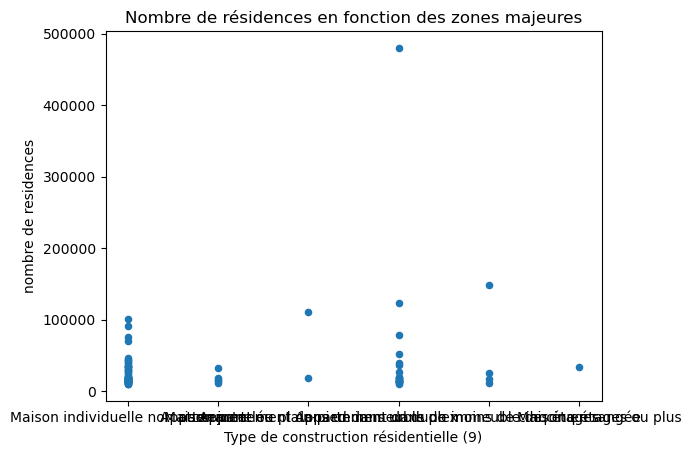

In [13]:
total_region.plot(kind = "scatter", x = 'Type de construction résidentielle (9)', y = "VALEUR",title="Nombre de résidences en fonction des zones majeures", ylabel = "nombre de residences")

In [14]:
total_by_region = total_region.groupby(["GÉO"]).sum()

In [15]:
max(total_by_region["VALEUR"])

906480.0

In [16]:
colors = {'Maison individuelle non attenante': 'orange', 'Appartement dans un immeuble de moins de cinq étages': 'purple','Maison jumelée': 'blue','Appartement dans un immeuble de cinq étages ou plus': 'yellow', 'Maison en rangée': 'green',"Appartement ou plain-pied dans un duplex" :"black"}

In [17]:
total_by_category

VALEUR
GÉO                   Type de construction résidentielle (9)                     
Antoine-Labelle       Maison individuelle non attenante                   13525.0
Argenteuil            Maison individuelle non attenante                   11445.0
Arthabaska            Maison individuelle non attenante                   19865.0
Beauce-Sartigan       Maison individuelle non attenante                   15610.0
Beauharnois-Salaberry Maison individuelle non attenante                   15860.0
...                                                                           ...
Sherbrooke            Maison individuelle non attenante                   29730.0
Thérèse-De Blainville Appartement dans un immeuble de moins de cinq é...  19510.0
                      Maison individuelle non attenante                   36450.0
Vaudreuil-Soulanges   Appartement dans un immeuble de moins de cinq é...  11800.0
                      Maison individuelle non attenante                   43635.0

[83 rows x 1 columns]

In [18]:
colors = {'Maison individuelle non attenante': 'orange', 'Appartement dans un immeuble de moins de cinq étages': 'purple','Maison jumelée': 'blue','Appartement dans un immeuble de cinq étages ou plus': 'yellow', 'Maison en rangée': 'green',"Appartement ou plain-pied dans un duplex" :"black"}
color_list = [colors[group[1]] for group in total_by_category.index.values]


In [19]:
total_by_category.index.values[0]

('Antoine-Labelle', 'Maison individuelle non attenante')

In [20]:
total_by_category.insert(1,"Rapport par région",total_by_category["VALEUR"]/total_by_region["VALEUR"])

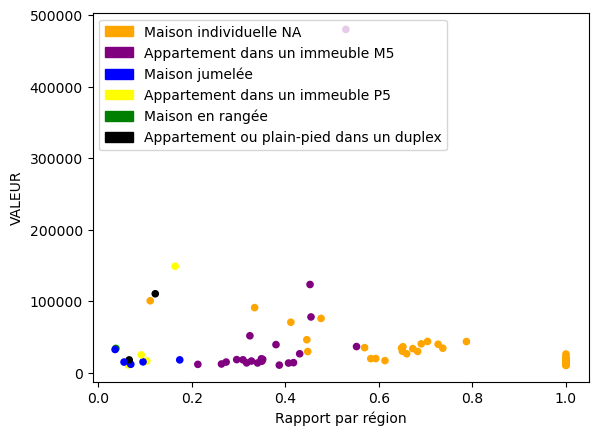

In [21]:
ax = total_by_category.plot(kind = "scatter", x = "Rapport par région", y = "VALEUR", c=color_list)
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['Maison individuelle non attenante'], label='Maison individuelle NA'),
    mpatches.Patch(color=colors['Appartement dans un immeuble de moins de cinq étages'], label='Appartement dans un immeuble M5'),
    mpatches.Patch(color=colors['Maison jumelée'], label='Maison jumelée'),
    mpatches.Patch(color=colors['Appartement dans un immeuble de cinq étages ou plus'], label='Appartement dans un immeuble P5'),
    mpatches.Patch(color=colors['Maison en rangée'], label='Maison en rangée'),
    mpatches.Patch(color=colors['Appartement ou plain-pied dans un duplex'], label='Appartement ou plain-pied dans un duplex'),# add as many as needed
]
ax.legend(handles=legend_handles,
          loc='upper left')

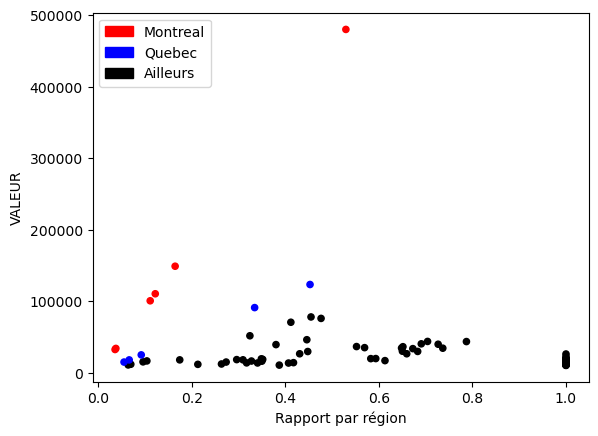

In [22]:
colors = {"Autre":"black","Montreal":"red","Quebec":"blue"}
color_list = ["blue" if group[0] == "Québec"  else "black"  if group[0] != "Montréal" else "red" for group in total_by_category.index.values]


ax = total_by_category.plot(kind = "scatter", x = "Rapport par région", y = "VALEUR", c=color_list)
legend_handles = [
    mpatches.Patch(color="red", label='Montreal'),
    mpatches.Patch(color="blue", label='Quebec'), # add as many as needed
    mpatches.Patch(color="black", label='Ailleurs'), # add as many as needed

]
ax.legend(handles=legend_handles,
          loc='upper left')